In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
#boston = datasets.load_boston()
shuttle_data = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
#boston_data = pd.DataFrame(boston.data)
#boston_data.columns = iris.feature_names
#boston_data['Type']=iris.target
shuttle_data_used = shuttle_data[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
print(shuttle_data.all)
print("Kurtosis result : {}".format(shuttle_data_used.kurtosis()))
print("Skew result : {}".format(shuttle_data_used.skew()))

<bound method DataFrame.all of            0     1      2    3     4      5     6      7      8  9
0      108.0   3.0  109.0  0.0  72.0    7.0   1.0   36.0   36.0  o
1       81.0   0.0   84.0  0.0 -14.0   -2.0   4.0  100.0   96.0  o
2       81.0   0.0   84.0  0.0 -20.0   16.0   4.0  105.0  102.0  o
3       76.0  -1.0   81.0  0.0 -42.0   -3.0   5.0  125.0  120.0  o
4      105.0   0.0  107.0  2.0  70.0    0.0   1.0   37.0   36.0  o
5       79.0   0.0   83.0 -1.0 -40.0    7.0   4.0  124.0  120.0  o
6       80.0   0.0   84.0  0.0 -36.0    0.0   4.0  120.0  116.0  o
7      102.0   2.0  103.0  1.0  72.0   29.0   1.0   31.0   30.0  o
8       76.0   3.0   80.0  2.0 -42.0    0.0   4.0  124.0  120.0  o
9      102.0   0.0  104.0  0.0  70.0  -10.0   1.0   34.0   32.0  o
10      82.0   0.0   86.0  0.0 -12.0  -28.0   3.0   99.0   96.0  o
11      83.0   0.0   86.0  0.0  -2.0    0.0   3.0   88.0   86.0  o
12      77.0 -44.0  107.0  0.0  62.0   -4.0  30.0   45.0   16.0  o
13      81.0   4.0   84.0  0.0 

In [2]:
from scipy.cluster.vq import kmeans, kmeans2
from scipy import cluster
import numpy as np

cluster_number = 3
column = 0
column2 = 5
axe1 = shuttle_data_used[column]
axe2 = shuttle_data_used[column2]
# Get centroids and average distance
#centroids, avg_distance = kmeans(axe1, cluster_number)
# Get the groups (clusters) and distances
#groups, cluster_distance = cluster.vq.vq(axe1, centroids)

# Get centroids and average distance
centroids, avg_distance = kmeans2(shuttle_data_used, cluster_number)
# Get the groups (clusters) and distances
groups, cluster_distance = cluster.vq.vq(shuttle_data_used, centroids)

print(centroids)
print(avg_distance)
print(groups)
print(cluster_distance)
kmeans_result = pd.DataFrame(
    {'Column N°{}'.format(column): axe1,
     'Distance to centroid': cluster_distance,
     'Column N°{}'.format(column2): axe2,
     'Cluster': groups
     })
print(kmeans_result.all)

[[ 4.58486103e+01 -8.74810862e-01  8.40242627e+01 -8.74943591e-02
   4.44337554e+01  2.62281330e+00  3.81732898e+01  3.95773407e+01
   1.63536938e+00]
 [ 4.01717310e+01 -1.74120860e-02  8.83046546e+01  1.65380676e+00
   1.37919654e+01 -7.23477865e+00  4.82050757e+01  7.45643564e+01
   2.63710026e+01]
 [ 4.93333333e+01  3.33333333e-01  8.68333333e+01  2.90166667e+02
   1.51333333e+02  1.18595000e+04  3.73333333e+01 -6.46666667e+01
  -1.01666667e+02]]
[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]
[ 88.63543754  99.68584246 109.40807652 ...  13.59787185  29.2280659
  36.96206398]
<bound method DataFrame.all of        Column N°0  Distance to centroid  Column N°5  Cluster
0           108.0             88.635438         7.0        0
1            81.0             99.685842        -2.0        1
2            81.0            109.408077        16.0        1
3            76.0            132.846611        -3.0        1
4           105.0             85.216374         0.0        0
5            79.0            

In [3]:
cluster_length = []
i = 0
while i < cluster_number:
    cluster_length.append(i)
    cluster_length[i] = 0
    i += 1

for j in groups:
    cluster_length[j] += 1

print(cluster_length)

[37549, 8909, 6]


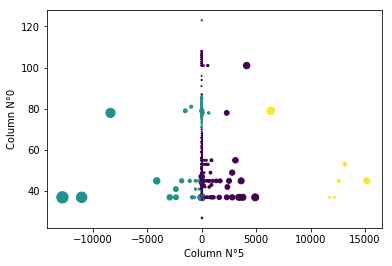

In [4]:
#axe1 = axe1.reshape(-1, 1)
clus = plt.scatter(axe2, axe1, s=cluster_distance*0.01, c=groups)#, edgecolors='r', facecolors='none')
plt.ylabel('Column N°{}'.format(column))
plt.xlabel('Column N°{}'.format(column2))
plt.show(clus)

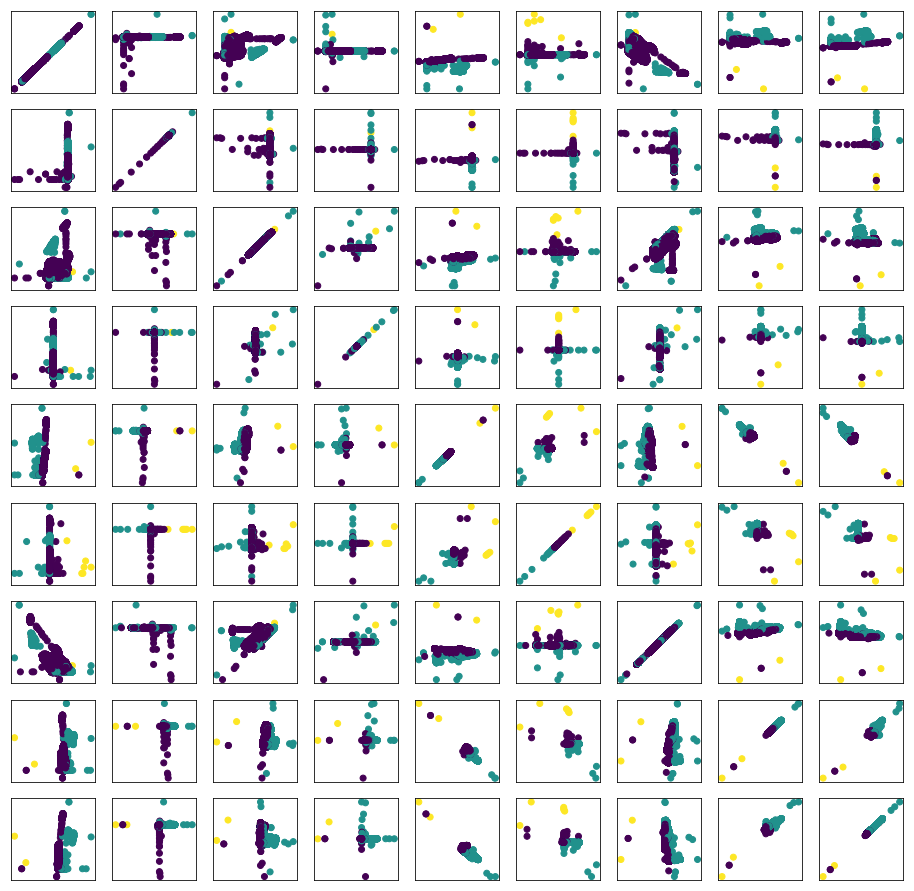

In [10]:
#nombre de variables
fig, axes = plt.subplots(figsize=(16,16))
p = shuttle_data.shape[1]
plot_num = 1
i = 0
while i < p - 1:
    j = 0
    while j < p - 1:
        plt.subplot(p-1, p-1, plot_num)
        #plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        plt.scatter(shuttle_data_used[i], shuttle_data_used[j], c=groups)#, s=cluster_distance*0.01)#, edgecolors='r', facecolors='none')
        #plt.ylabel('Column N°{}'.format(i))
        #plt.xlabel('Column N°{}'.format(j))
        #plt.xlim(-7, 7)
        #plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        #plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
        #         transform=plt.gca().transAxes, size=15,
        #         horizontalalignment='right')
        plot_num += 1
        j += 1
    i += 1
plt.show()

Result of PCA = [[  4.88217803  -4.3892901 ]
 [ -6.52468637  -0.81690544]
 [ 11.27347839  -0.79024105]
 ...
 [ -1.93680383  -0.96373515]
 [-27.17440384  -0.76938643]
 [ -2.43248458   2.7229562 ]]
Result of PCA = (46464, 2)


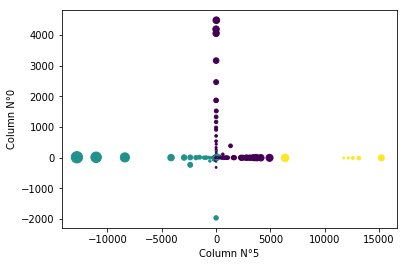

In [20]:
from sklearn import decomposition
#axe1 = axe1.reshape(-1, 1)
pca = decomposition.PCA(n_components=2)
pca.fit(shuttle_data_used)
shuttle_data_used_2 = pca.transform(shuttle_data_used)
print("Result of PCA = {}".format(shuttle_data_used_2))
print("Result of PCA = {}".format(shuttle_data_used_2.shape))
#fig, axes = plt.subplots(figsize=(12,12))
clus = plt.scatter(shuttle_data_used_2[:,0], shuttle_data_used_2[:,1], s=cluster_distance*0.01, c=groups)#, edgecolors='r', facecolors='none')
plt.ylabel('Column N°{}'.format(column))
plt.xlabel('Column N°{}'.format(column2))
plt.show(clus)

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
#pca.fit(shuttle_data_used)
Z = pca.fit_transform(shuttle_data_used)

colour =('orange', 'white', 'black','violet','green','yellow')
region = tuple(Z.ix[:,1].unique())
plt.close()
fig= plt.figure(figsize=(20,20))
ax = Axes3D(fig)
for i, j in zip(region,colour):
        ax.scatter(Z.ix[Z.Region==i, 2],
                    Z.ix[Z.Region==i, 3],
                    Z._ix[Z.Region==i,4],
                    label=i,
                    c=j,s=30)
ax.plot([0], [0], [0], 'o', markersize=12,
        color='red')
for s,lab in zip(vec_propres,res_2.index):
    ax.plot([0, s[0]], [0, s[1]],
           [0, s[2]], color='red', lw=2)
    ax.text(s[0],
            s[1],
            s[2],lab,size = 7,color='red')
for n,t in zip(Z.index,Z._ix[:,0]):
        ax.text(Z.ix[n, 2],
                Z.ix[n, 3],
                Z.ix[n, 4],t,size = 5,color = 'darkblue')
ax.set_xlabel('Composant Principal 1(~ 35%)')
ax.set_ylabel('Composant Principal 2(~ 21%)')
ax.set_zlabel('Composant Principal 3(~ 15%)')
plt.show()

#fig, axes = plt.subplots(figsize=(12,12))
#axes.set_xlim(-15000,15000) #même limites en abscisse
#axes.set_ylim(-15000,15000) #et en ordonnée
#clus = plt.scatter(shuttle_data_used[:, 0], shuttle_data_used[:, 1], s=cluster_distance*0.01, c=groups)#, edgecolors='r', facecolors='none')
#plt.ylabel('Column N°{}'.format(column))
#plt.xlabel('Column N°{}'.format(column2))
#plt.xaxis.set_ticklabels([])
#plt.yaxis.set_ticklabels([])
#plt.show(clus)

AttributeError: 'numpy.ndarray' object has no attribute 'ix'